# import basic library

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np

# import the data

In [2]:
movies = pd.read_csv("movie_data.csv")
movies.head()

,runtime,vote_average,release_month,Comedy,Crime,Drama,Action,Thriller,Romance,Adventure,...,Empty,TVMovie,Foreign,PC_class,log_raw_budget,log_raw_revenue,log_budget,log_revenue,log_popularity,log_vote_count
0,105.0,8.2,5,1,1,0,0,0,0,0,...,0,0,0,2,14.616391,17.661131,14.616391,17.661131,2.289601,8.460199
1,111.0,8.3,9,0,1,1,1,0,0,0,...,0,0,0,3,17.181426,18.221813,17.181426,18.221813,3.572093,9.278279
2,81.0,7.3,3,0,0,1,1,1,0,0,...,0,0,0,3,14.741554,16.299710,14.741554,16.299710,2.411977,7.303843
3,104.0,7.8,1,1,1,0,0,0,0,0,...,0,0,0,1,16.562782,18.685736,16.562782,18.685736,2.897458,8.782630
4,119.0,7.4,3,1,0,0,0,0,1,0,...,0,0,0,1,17.172408,20.671077,17.172408,20.671077,3.953932,8.633375


# divide the data into predictor and responser

In [3]:
# Data without taking inflation into acount
log_raw_revenue = pd.DataFrame(movies['log_raw_revenue'])
X_raw = pd.DataFrame(movies.drop(['log_revenue','log_budget','log_raw_revenue'],axis = 1))

# Data taking inflation into acount
log_revenue = pd.DataFrame(movies['log_revenue'])
X = pd.DataFrame(movies.drop(['log_revenue','log_raw_revenue','log_raw_budget'],axis = 1))

# Spliting test and train data

In [4]:
X_raw_train,X_raw_test,log_raw_revenue_train,log_raw_revenue_test = train_test_split(X_raw,log_raw_revenue,test_size = 0.25)
X_train,X_test,log_revenue_train,log_revenue_test = train_test_split(X,log_revenue,test_size=0.25)

# Train the regression tree

In [5]:
RegrTree_raw = DecisionTreeRegressor(max_depth=5)
RegrTree_raw.fit(X_train,log_revenue_train)
RegrTree = DecisionTreeRegressor(max_depth = 5)
RegrTree.fit(X_raw_train,log_raw_revenue_train)

DecisionTreeRegressor(max_depth=5)

In [6]:
print("Without adjusting the revenue and budget according to inflation")
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model(raw) \tTrain Dataset")
print("Classification Accuracy \t:", RegrTree_raw.score(X_raw_train, log_raw_revenue_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model(raw) \tTest Dataset")
print("Classification Accuracy \t:", RegrTree_raw.score(X_raw_test, log_raw_revenue_test))
print()

print("Adjust the revenue and budget according to inflation")
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", RegrTree.score(X_train, log_revenue_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", RegrTree.score(X_test, log_revenue_test))
print()

Without adjusting the revenue and budget according to inflation
Goodness of Fit of Model(raw) 	Train Dataset
Classification Accuracy 	: 0.6738109669041268

Goodness of Fit of Model(raw) 	Test Dataset
Classification Accuracy 	: 0.6082639782113795

Adjust the revenue and budget according to inflation
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6495837243819904

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6209176981281174



In [7]:
y_raw_train_pred = RegrTree_raw.predict(X_raw_train)
y_raw_test_pred = RegrTree_raw.predict(X_raw_test)

y_train_pred = RegrTree.predict(X_train)
y_test_pred = RegrTree.predict(X_test)

In [8]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(log_raw_revenue_train,y_raw_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

print("Adjusting the revenue:")
mse = mean_squared_error(log_revenue_train,y_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Mean Squared Error (MSE) 	: 1.446613950852499
Root Mean Squared Error (RMSE) 	: 1.2027526557245671
Adjusting the revenue:
Mean Squared Error (MSE) 	: 1.5487891068334259
Root Mean Squared Error (RMSE) 	: 1.2445035583852004


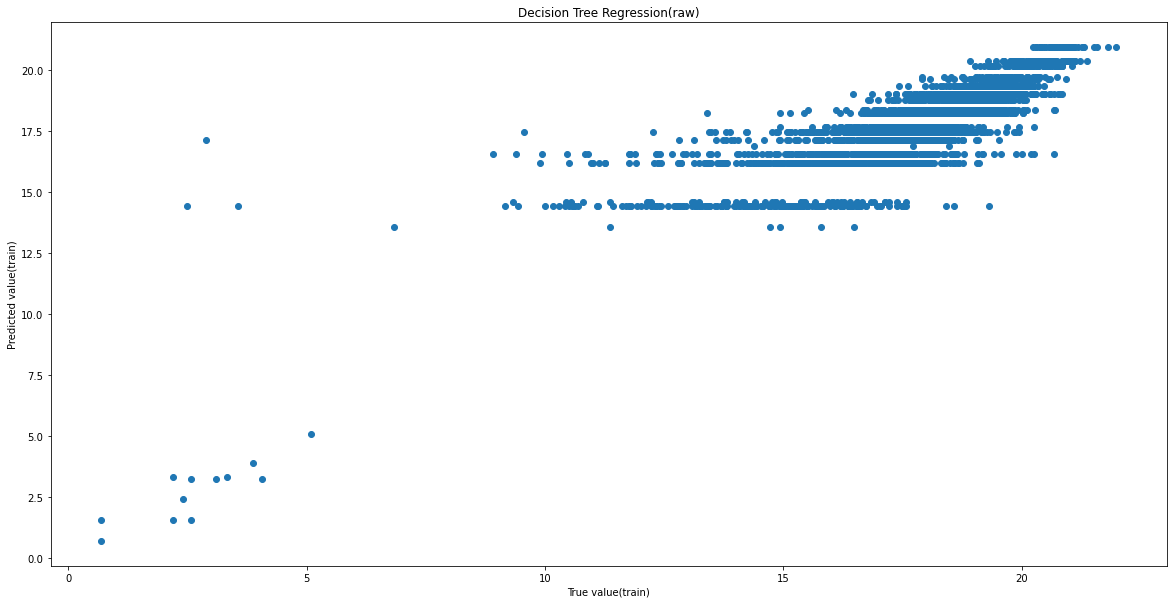

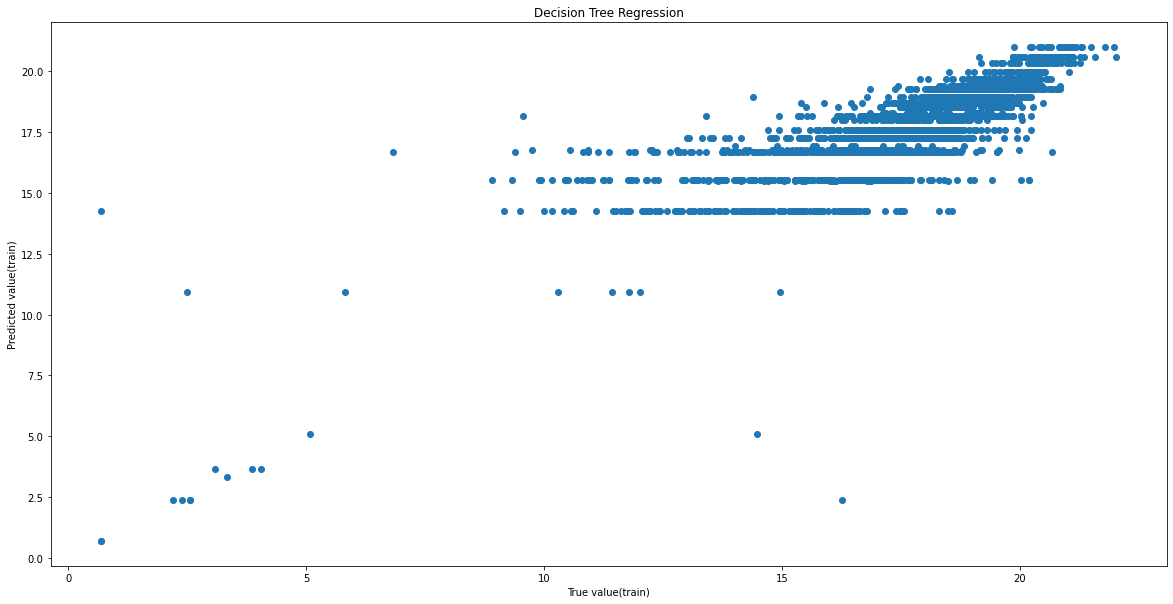

In [9]:
plt.figure(figsize = (20,10))
plt.scatter(x = log_raw_revenue_train,y = y_raw_train_pred,)
plt.xlabel("True value(train)")
plt.ylabel("Predicted value(train)")
plt.title("Decision Tree Regression(raw)")
plt.show()

plt.figure(figsize = (20,10))
plt.scatter(x = log_revenue_train,y = y_train_pred,)
plt.xlabel("True value(train)")
plt.ylabel("Predicted value(train)")
plt.title("Decision Tree Regression")
plt.show()

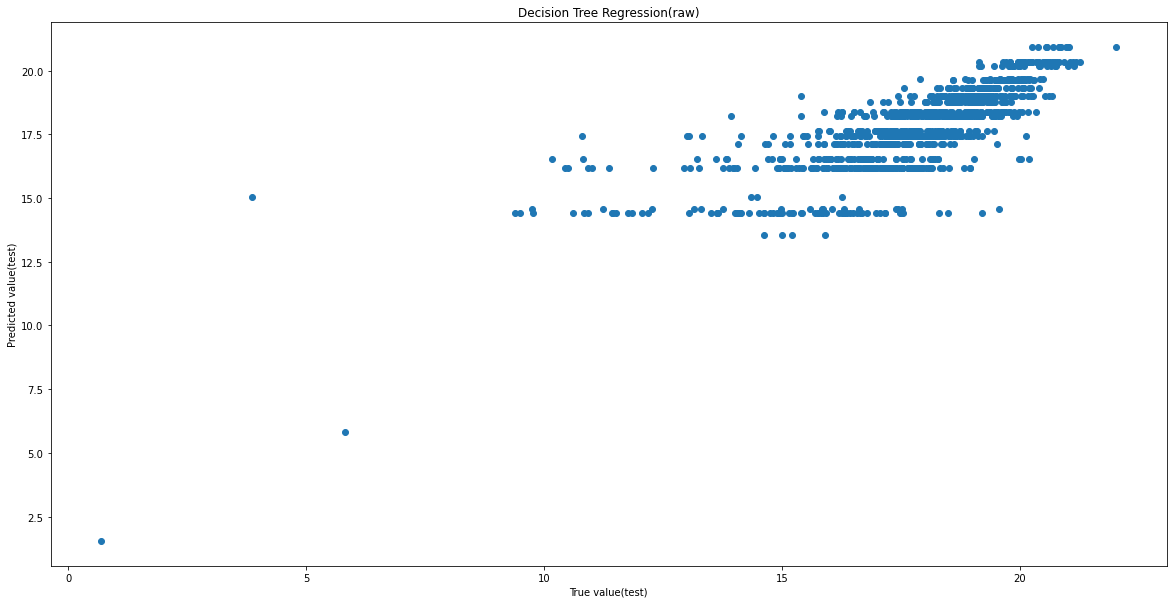

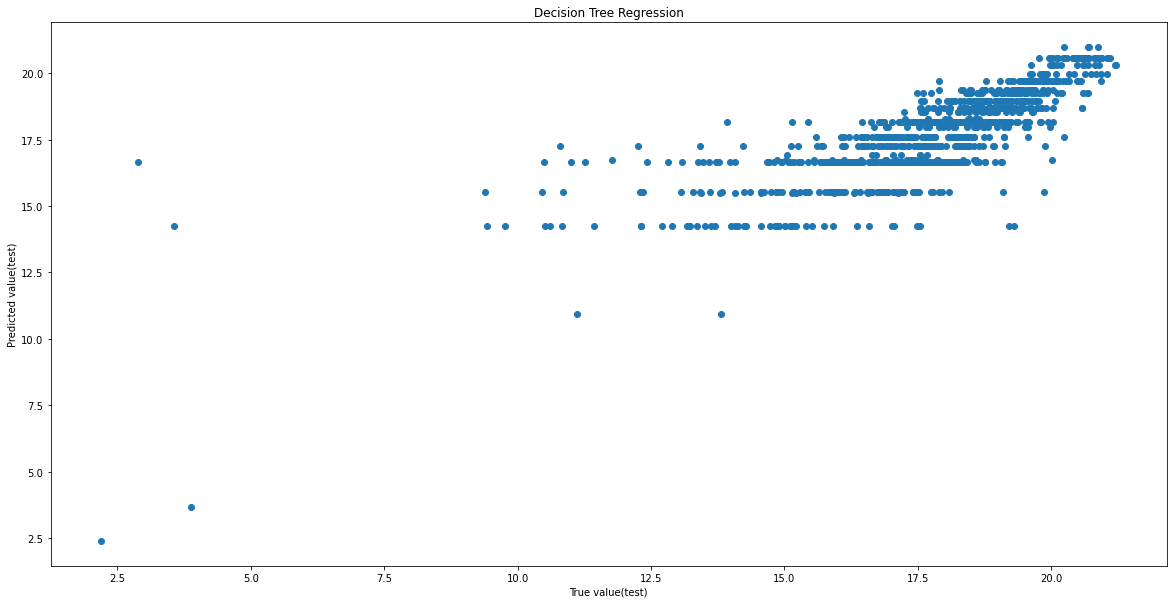

In [10]:
plt.figure(figsize = (20,10))
plt.scatter(x = log_raw_revenue_test,y = y_raw_test_pred,)
plt.xlabel("True value(test)")
plt.ylabel("Predicted value(test)")
plt.title("Decision Tree Regression(raw)")
plt.show()

plt.figure(figsize = (20,10))
plt.scatter(x = log_revenue_test,y = y_test_pred,)
plt.xlabel("True value(test)")
plt.ylabel("Predicted value(test)")
plt.title("Decision Tree Regression")
plt.show()

In [11]:
from sklearn.ensemble import RandomForestRegressor
regr_raw = RandomForestRegressor(max_depth=7)
regr_raw.fit(X_raw_train,log_raw_revenue_train['log_raw_revenue'])
regr= RandomForestRegressor(max_depth=7)
regr.fit(X_train,log_revenue_train['log_revenue'])

RandomForestRegressor(max_depth=7)

In [12]:
print("Without adjusting the revenue and budget according to inflation")
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", regr_raw.score(X_raw_train, log_raw_revenue_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", regr_raw.score(X_raw_test, log_raw_revenue_test))
print()

print("Adjust the revenue and budget according to inflation")
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", regr.score(X_train, log_revenue_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", regr.score(X_test, log_revenue_test))
print()

Without adjusting the revenue and budget according to inflation
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7805856603116483

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5661738799441356

Adjust the revenue and budget according to inflation
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7829001384552563

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6315242096227304



In [13]:
y_raw_train_pred = regr_raw.predict(X_raw_train)
y_raw_test_pred = regr_raw.predict(X_raw_test)
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

mse = mean_squared_error(log_raw_revenue_train,y_raw_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

print("Adjusting the revenue:")
mse = mean_squared_error(log_revenue_train,y_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Mean Squared Error (MSE) 	: 0.9730794496606094
Root Mean Squared Error (RMSE) 	: 0.9864478950560994
Adjusting the revenue:
Mean Squared Error (MSE) 	: 0.9595498955136513
Root Mean Squared Error (RMSE) 	: 0.9795661771997088


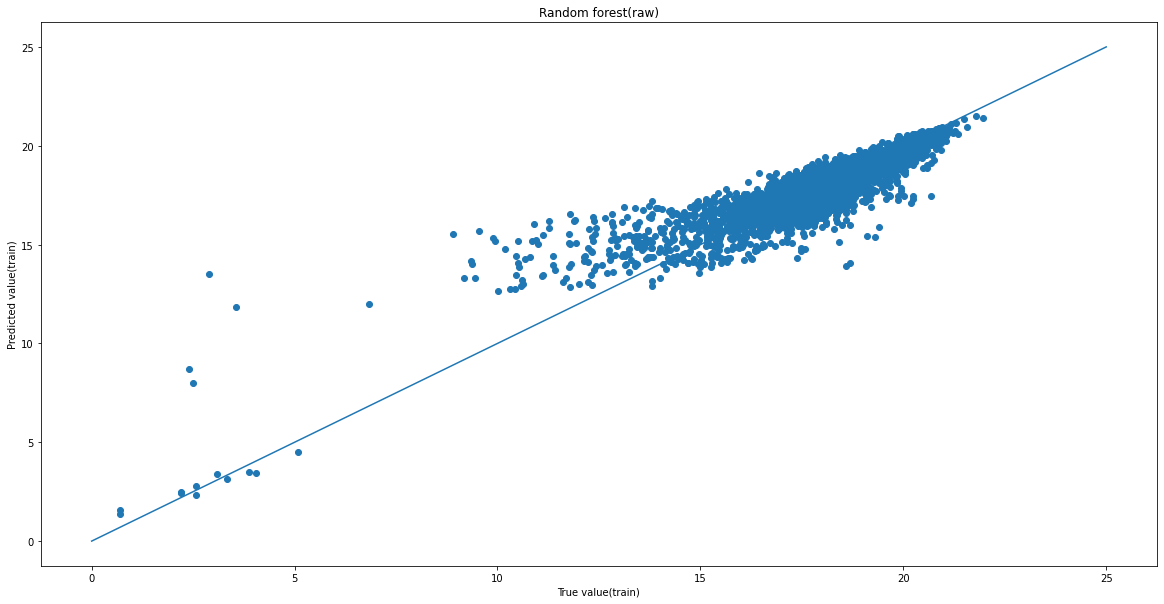

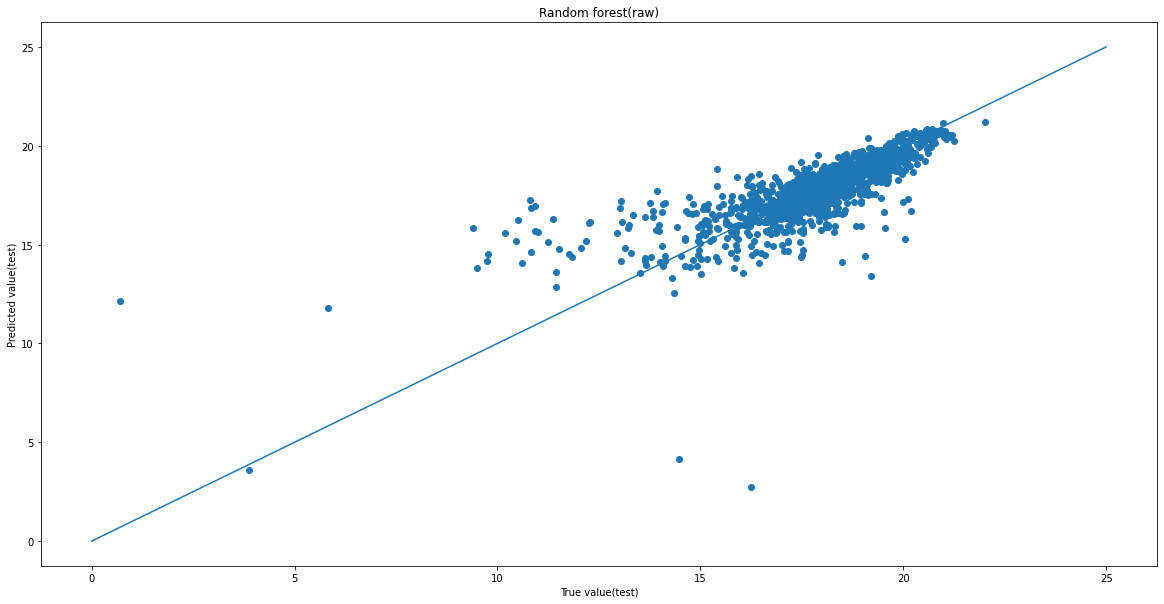

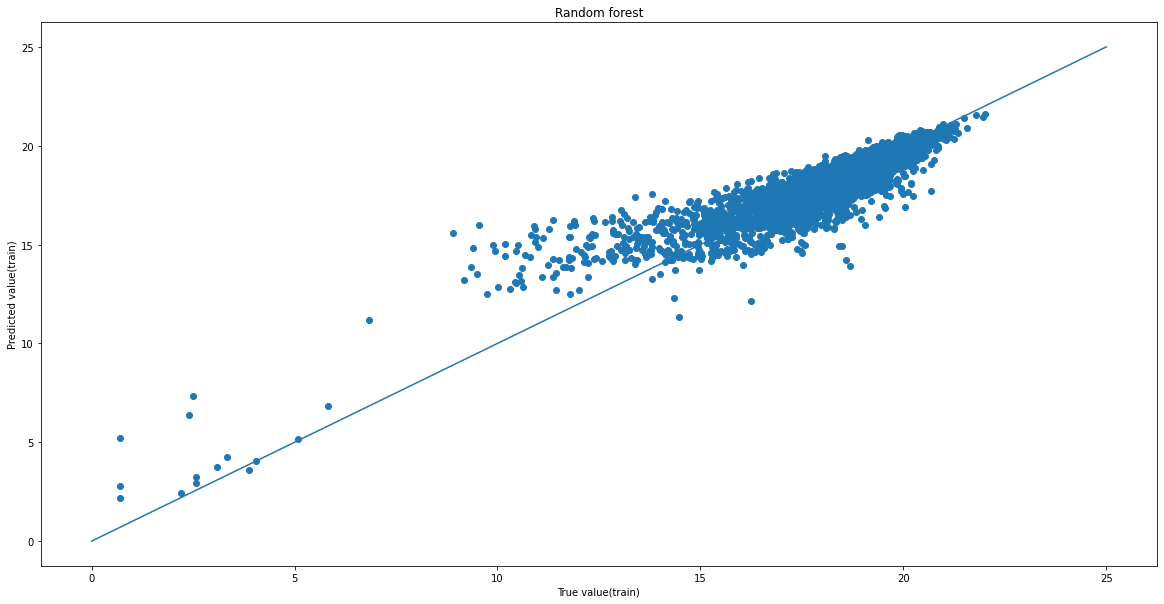

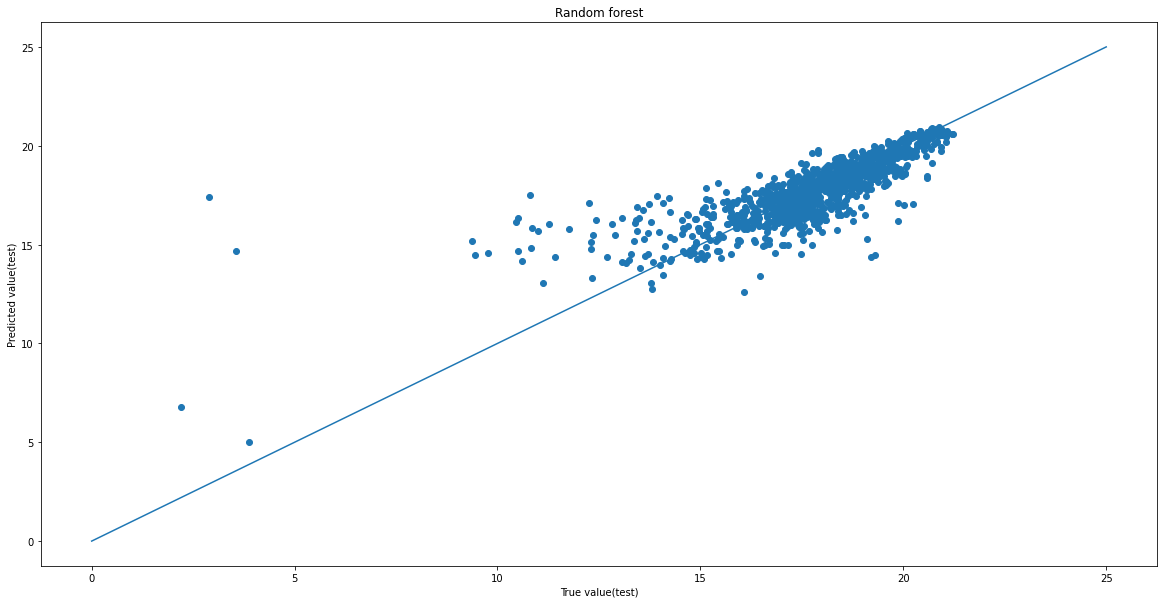

In [14]:
plt.figure(figsize = (20,10))
plt.scatter(x = log_raw_revenue_train,y = y_raw_train_pred)
a = np.linspace(0,25,1000)
plt.plot(a,a)
plt.xlabel("True value(train)")
plt.ylabel("Predicted value(train)")
plt.title("Random forest(raw)")
plt.show()

plt.figure(figsize = (20,10))
plt.scatter(x = log_raw_revenue_test,y = y_raw_test_pred)
a = np.linspace(0,25,1000)
plt.plot(a,a)
plt.xlabel("True value(test)")
plt.ylabel("Predicted value(test)")
plt.title("Random forest(raw)")
plt.show()

plt.figure(figsize = (20,10))
plt.scatter(x = log_revenue_train,y = y_train_pred)
a = np.linspace(0,25,1000)
plt.plot(a,a)
plt.xlabel("True value(train)")
plt.ylabel("Predicted value(train)")
plt.title("Random forest")
plt.show()

plt.figure(figsize = (20,10))
plt.scatter(x = log_revenue_test,y = y_test_pred)
a = np.linspace(0,25,1000)
plt.plot(a,a)
plt.xlabel("True value(test)")
plt.ylabel("Predicted value(test)")
plt.title("Random forest")
plt.show()